-0.15268184659588457 + (1.176143201623286)cos4x + (0.047542784699089236)cos1x + (0.686211436074576)cos2x + (-1.216913269932927)cos3x + (-0.0)sin0x + (-0.8179387079519563)sin1x + (--0.1802449973662844)sin2x + (--0.27534022636283273)sin3x + (-0.0)sin4x + 

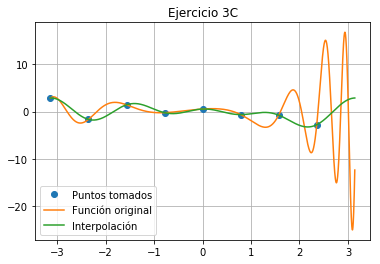

In [109]:
#De la libreria scipy importamos la función para fast fourier transform (fft)
from scipy.fftpack import fft

#Importamos librerias shidas para mate
import numpy as np
import math as mt

#Importamos libreria para graficar
import matplotlib.pyplot as plt

#Definimos la funcion

#EJERCICIO 3A
#def f(x):
#    r = mt.pi*(x - mt.pi)
#    return r

#EJERICICO 3B
#def f(x):
#    r = abs(x)
#    return r

#EJERICIO 3C
#def f(x):
#    r = np.cos(mt.pi*x) - 2*np.sin(mt.pi*x)
#    return r

#EJERICIO 3D
def f(x):
    r = x*np.cos(x**2) + np.exp(x)*np.cos(np.exp(x))
    return r

#Obtenemos los puntos del intervalo donde evaluaremos
x = np.arange(-mt.pi, mt.pi, mt.pi/4) 

#Para graficar
xTry = np.arange(-mt.pi, mt.pi, 0.001)

#Evaluamos la función
y = f(x)

#Graficamos los puntos sobre los que se realiza la interpolación
plt.plot(x, y, "o", label="Puntos tomados")
plt.plot(xTry, f(xTry), "-", label = "Función original")

#Obtenemos los c_k de fast fourier transform
fy = fft(y)

#convertimos las parte real y la parte imaginaria de las c_k en las a_k y las b_k, respectivamente
for i in range(8):
    fy[i] = fy[i]*(-1)**(i)/4
    
#El a_0 y el a_m van divididos entre dos, no solo entre m

#Imprimimos el polinomio resultante
print(f"{fy[0].real/2} + ({fy[4].real/2})cos4x +", end = " ")
for i in range(1, 4, 1):
    print(f"({fy[i].real})cos{i}x +", end=" ")
for i in range(0, 5, 1):
    print(f"(-{fy[i].imag})sin{i}x +", end=" ")

def interpolation(x):
    R = fy[0].real/2 + fy[4].real*mt.cos(4*x)/2
    for i in range(1, 4, 1):
        R += fy[i].real*mt.cos(i*x)
    for i in range(0, 5, 1):
        R += -fy[i].imag*mt.sin(i*x)
    return R

xTry = np.arange(-mt.pi, mt.pi, 0.001)
#fyTry = np.arange(-mt.pi, mt.pi, 0.001)
j = 0
for i in xTry:
    fyTry[j] = interpolation(xTry[j])
    j += 1

plt.plot(xTry, fyTry, label = "Interpolación")

plt.legend(loc = "lower left")
plt.title("Ejercicio 3C")
plt.grid()

1
2
3
4


5j
